## Motivation
The top countries are: `Botswana, Tunisia, Libya, Namibia, South Africa, Eswatini (Swaziland), Morocco`. Three countries in North Africa,  four in South Africa. These countries are relatively high income in Africa. `Tunisia and Morocco` are currently relatively stable. `Libya` has an ongoing civil war - but maybe reporting is from a stable portion of the country. Can we find any info on Libya and Covid? In the South, `South Africa` is middle income - and has been the focus for covid in Africa. Both `Namibia and Botswana` are middle income and fairly stable.  `Eswatini` is a small poor country,  surrounded by S. Africa. I am not sure why it would have higher reporting - maybe monitoring from South Africa. We will want to have a chart looking at income versus casecount in Africa.

In [68]:
from cmath import nan
from data import loader
import pandas as pd
import numpy as np
import datetime
countries_of_interest = ["Botswana", "Tunisia", "Libya", "Namibia", "South Africa", "Eswatini", "Morocco"]

In [69]:
df = pd.read_csv("owid-covid-data.csv", usecols=["location", "date", "new_cases_smoothed",
 "new_deaths_smoothed", "population", "gdp_per_capita"])

pattern = r'(\b{}\b)'.format('|'.join(countries_of_interest))
df = df.loc[df["location"].str.contains(pattern)]
# print(df)

<ipython-input-69-43b3c93760fe>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df.loc[df["location"].str.contains(pattern)]


In [70]:
# For each country, comute their daily average, daily max, and daily median
death_stat = {"mean":[], "max":[], "50%":[]} 
case_stat = {"mean":[], "max":[], "50%":[]} 
gdp = [] # Same length as countries
stat_names = ["mean", "max", "50%"]
for country in countries_of_interest:
    stat = df.loc[df["location"] == country].describe()

    # Record data
    gdp.append(stat["gdp_per_capita"]["50%"])
    for name in stat_names:
        death_stat[name].append(stat["new_deaths_smoothed"][name])
        case_stat[name].append(stat["new_cases_smoothed"][name])
    # print(stat)

print(gdp)
print(countries_of_interest)

[15807.374, 10849.297, 17881.509, 9541.808, 12294.876, 7738.975, 7485.013]
['Botswana', 'Tunisia', 'Libya', 'Namibia', 'South Africa', 'Eswatini', 'Morocco']


In [71]:
# Sort the country by GDP normalized by population density
print(countries_of_interest)
sorted_index = np.argsort(gdp).tolist()
for key in death_stat.keys():
    death_stat[key] = [death_stat[key][i] for i in sorted_index]
    case_stat[key] = [case_stat[key][i] for i in sorted_index]
gdp = [gdp[i] for i in sorted_index]
countries_of_interest = [countries_of_interest[i] for i in sorted_index]
print(countries_of_interest)

['Botswana', 'Tunisia', 'Libya', 'Namibia', 'South Africa', 'Eswatini', 'Morocco']
['Morocco', 'Eswatini', 'Namibia', 'Tunisia', 'South Africa', 'Botswana', 'Libya']


[7485.013, 7738.975, 9541.808, 10849.297, 12294.876, 15807.374, 17881.509]


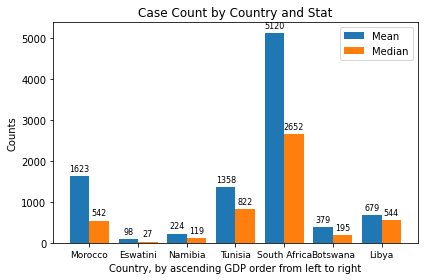

<Figure size 432x288 with 0 Axes>

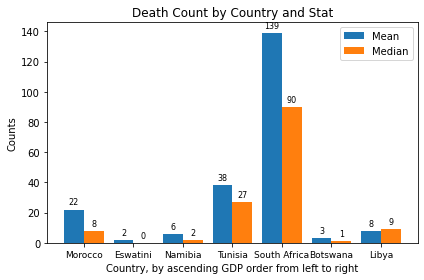

<Figure size 432x288 with 0 Axes>

In [96]:
import matplotlib.pyplot as plt
# Plot each country with respect to their GDP

dataname = ["Case", "Death"]
print(gdp)
for idx, stat in enumerate([case_stat, death_stat]):
    # Round to int
    for index, name in enumerate(stat_names):
        stat[name] = [int(item) for item in stat[name]]
    label_loc = np.arange(len(countries_of_interest))
    width = 0.4
    fig, ax = plt.subplots()

    mean = ax.bar(label_loc - width/2, stat["mean"], width, label="Mean")
    median = ax.bar(label_loc + width/2, stat["50%"], width, label="Median")
    # max = ax.bar(label_loc + width/3, stat["max"], width, label="Max")

    ax.set_ylabel("Counts")
    ax.set_xlabel("Country, by ascending GDP order from left to right")
    ax.set_title(dataname[idx] + " Count by Country and Stat")
    ax.set_xticks(label_loc, countries_of_interest)
    ax.xaxis.set_tick_params(labelsize=9)
    ax.legend(fontsize=10)

    ax.bar_label(mean, padding=3, fontsize=8)
    ax.bar_label(median, padding=3, fontsize=8)
    # ax.bar_label(max, padding=1)

    fig.tight_layout()
    plt.show()
    plt.savefig("results/incomeVScounts/" + dataname[idx] + " Count.png")
